<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Logistic%20Regression/CEP_TA_session_Oct_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression in Practice

In this session, we shall apply logistic regression and look at predictions using it.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.

In [ ]:
from sklearn.datasets import load_iris  #importing the load_iris class
iris_data = load_iris() #loading the iris dataset in iris_data

print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X = iris_data['data'][:,:2]
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

From the description, it is clear that *iris* dataset consists of essentially 3 classes: *Iris-Setosa*, *Iris-Versicolour*, *Iris-Virginica*. As logistic regression has been introduced as a binary classifier, we can alter the data into a binary classification problem based on finding whether a flower belongs to *Iris-Virginica* or not. In order to do that, we change the labels $\{0,1\}$ to $0$ and 2 to 1.

In [ ]:
y = np.where(iris_data['target'] == 2, 1, 0) #shorthand notation to change all labels other than 2 as 0 and 2 as 1
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('Size of training set:', len(X_train))
n = len(X_train)
print('Size of testing set:', len(X_test))
print(y_test)

Size of training set: 105
Size of testing set: 45
[0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 1 0]


We can further write $p(x)$ equivalently as:

$
p(x)=p(x;\beta_0,\beta_1) = \frac{1}{1+e^{-(\beta_0 + \beta_1^T x)}}, \text{where }\beta_1,x\in\mathbb{R}^2.
$

If we denote $p(x)$ simply as $p$ and if we have the notations $\mathbf{x}=\begin{bmatrix}
x \\ 1
\end{bmatrix}, \beta=\begin{bmatrix}
\beta_1 \\ \beta_0
\end{bmatrix}$
then we can write:

$
\begin{align}
p = \frac{1}{1+e^{-\beta^\top \mathbf{x}}}.
\end{align}
$

Then note the following that the following algebraic manipulations hold:

$
\begin{align}
p &= \frac{1}{1+e^{-\beta^\top \mathbf{x}}} \\
\implies 1 + e^{-\beta^\top \mathbf{x}} &= \frac{1}{p} \\
\implies  e^{-\beta^\top \mathbf{x}} &= \frac{1}{p} - 1 \\
\implies  e^{-\beta^\top \mathbf{x}} &= \frac{1-p}{p} \\
\implies \ln e^{-\beta^\top \mathbf{x}} &= \ln \frac{1-p}{p} \\
\implies -\beta^\top \mathbf{x} &= \ln \frac{1-p}{p} \\
\implies \beta^\top \mathbf{x} &= \ln \frac{p}{1-p} \\
\implies \beta_0 + \beta_1^T x &= \ln \frac{p}{1-p}.
\end{align}
$

Thus, even if we did not have a straightforward dependence of $Y$ on an observation $x$ of $X$ as a linear relation, we see that the linear relation $\beta_0 + \beta_1 x$ is related to the probability $p$ using:

$
\ln\frac{p}{1-p}=\beta^\top \mathbf{x}.
$

Note that the ratio $\frac{p}{1-p}$ is called $\textbf{odds}$ that the event $Y=1$ occurs, and hence $\ln \frac{p}{1-p}$ denotes the $\textbf{log odds}$. 

More popularly, the log odds $\ln \frac{p}{1-p}$ is called the $\textbf{logit}$ function. 


$\Large{\text{Likelihood function}}$ 

We now define a quantity which will be useful in the estimation of the parameters $\beta_0, \beta_1$ used to model $p$.


Given an observation $X=x$ we define the $\textbf{likelihood function}$ as: 

$
L(y;p) = p^y(1-p)^{(1-y)}
$

where recall that $p=p(x)=p(x;\beta_0,\beta_1)=\frac{1}{1+e^{-{(\beta_0 + \beta_1^T x)}}}$. Note that likelihood function is simply an equivalent way to represent $P[Y=y]$, when $Y$ is assumed to be Bernoulli random variable. 

Then observe that the natural goal is to maximize the likelihood function with respect to parameters $\beta_0, \beta_1$. 

Now given a data set $D$ containing $n$ observations of the form $\{({x}^1,y^1), ({x}^2,y^2), \ldots, ({x}^n,y^n)\}$, and assuming that the pairs $({x}^i,y^i)$ are independent observations, then it is possible to extend the likelihood function as: 

$
\begin{align}
L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \Pi_{i=1}^{n} {(p^i)}^{y^i}(1-p^i)^{(1-y^i)}.
\end{align}
$

We can now write the $\textbf{log likelihood}$ function as:

$
\begin{align}
\ln L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
\end{align}
$

Since log likelihood function is monotonic, maximizing the likelihood function is equivalent to maximizing the log likelihood function. 

Hence the concerned optimization problem is: 

$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

Note that $p^i = p(x^i) = p(x^i; \beta_0, \beta_1) = \frac{1}{1+e^{-{(\beta_0 + \beta_1^T x^i)}}}, \forall i = 1,\ldots,n$.



$\Large{\text{Solving the likelihood maximization problem}}:$

To solve 

$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

we can find the derivatives of the objective function with respect to $\beta_0$ and $\beta_1$ as:

$
\begin{align}
\frac{\partial{ \ln L }} {\partial \beta_0} &= \sum_{i=1}^{n} y^i (1-p^i) - (1-y^i) p^i \\ 
\frac{\partial{ \ln L }} {\partial \beta_1} &= \sum_{i=1}^{n} x^i(y^i (1-p^i) - (1-y^i) p^i)
\end{align}. 
$

Equating these derivatives to zero will lead to system of non-linear equations which is generally difficult to solve to obtain closed form expression. 

Hence we generally adopt an iterative procedure as follows to find the optimal $\beta_0, \beta_1$. 

$\large{\text{Gradient ascent for solving the likelihood maximization problem}}:$

$
\begin{align}
&\textbf{Step 0:}  \text{Input data set $D$, tolerances $\epsilon_1, \epsilon_2$.} \\
&\textbf{Step 1:}  \text{Start with arbitrary $\beta_0, \beta_1$.} \\
&\textbf{Step 2:}  \text{For $k=1,2,\ldots$} \\
&\quad \quad \textbf{Step 2.1:} \text{Compute differentials  $\frac{\partial{ \ln L }} {\partial \beta_0}$ and $\frac{\partial{ \ln L }} {\partial \beta_1}$} \\
&\quad \quad \textbf{Step 2.2:}  \text{Compute step length $\eta$ using line search procedure} \\
&\quad \quad \textbf{Step 2.3:}  \beta_0 = \beta_0 + \eta \frac{\partial{ \ln L }} {\partial \beta_0} \\
&\quad \quad \textbf{Step 2.4:}  \beta_1 = \beta_1 + \eta \frac{\partial{ \ln L }} {\partial \beta_1} \\
&\quad \quad \textbf{Step 2.5:}  \text{if $\|\nabla_{\beta} \ln L\|_2 \leq \epsilon_1$ break from loop} \\
&\quad \quad \textbf{Step 2.6:}  \text{if relative change in function value is $\leq \epsilon_2$ break from loop} \\
&\textbf{Step 3:}  \text{ Output $\beta_0, \beta_1$}
\end{align}
$

Note that $\nabla_{\beta} \ln L$ denotes the gradient of $\ln L$ with respect to $\beta$ given by:

$
\nabla_{\beta} \ln L = \begin{bmatrix}
\frac{\partial{ \ln L }} {\partial \beta_0}\\
\frac{\partial{ \ln L }} {\partial \beta_1}
\end{bmatrix}
$

and $\eta$ denotes the learning rate. 


$\Large{\text{Computing } \beta \text{ for the training data set}}:$

In [ ]:
import numpy as np
#computing log likelihood function
def log_likelihood(beta_0,beta_1):
  log_likelihood = 0.0
  for i in range(n):
    x_i = X_train[i] #access element in training data
    y_i = float(y_train[i]) #access label in trainning data
    p_i = 1.0/(1.0+np.exp(-beta_0 - np.dot(beta_1,x_i))) #probability with the current beta_0, beta_1
    log_likelihood += y_i*np.log(p_i) + (1.0-y_i)*np.log(1-p_i)
  return log_likelihood

Initial values: beta_0: 0.0  beta_1: [0. 0.]  log likeihood: -72.78045395879433
k:  0  beta_0: -0.0015500000000000002  beta_1: [-0.00631 -0.00488]  grad norm: 81.26069160424368 log likeihood: -72.15734638313027
k:  10000  beta_0: -1.9873083366853073  beta_1: [ 1.22483999 -1.94405411]  grad norm: 1.573914284723166 log likeihood: -51.20199218606285
k:  20000  beta_0: -3.406010171338023  beta_1: [ 1.37094165 -1.76496012]  grad norm: 1.3213727209653952 log likeihood: -49.1281937519371
k:  30000  beta_0: -4.60757762834305  beta_1: [ 1.47391131 -1.57067582]  grad norm: 1.1283417302495815 log likeihood: -47.63298860078023
k:  40000  beta_0: -5.638083540780409  beta_1: [ 1.56421139 -1.4083446 ]  grad norm: 0.9712535643092834 log likeihood: -46.53449079631529
k:  50000  beta_0: -6.529158088694955  beta_1: [ 1.64458629 -1.27284031]  grad norm: 0.8427661048665015 log likeihood: -45.71428477146024
k:  60000  beta_0: -7.305590752157852  beta_1: [ 1.71631571 -1.15836259]  grad norm: 0.73674639243492

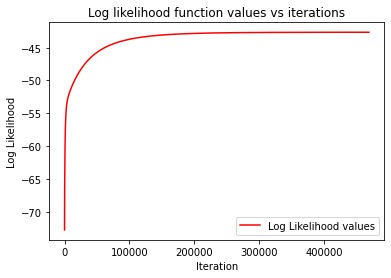

In [ ]:
#gradient ascent for likelihood maximization 
beta_0 = 0.0
beta_1 = np.zeros(2)
max_iter = 1000000
eps_1 = 0.00001 #tolerance for gradient norm
eps_2 = 1e-9 #tolerance for relative function value difference

f_val = log_likelihood(beta_0,beta_1)

#store the objective function values for plotting purposes
f_val_list = [] 
f_val_list.append(f_val)

print('Initial values: beta_0:',beta_0, ' beta_1:',beta_1, ' log likeihood:', f_val)
#the loop 
for k in range(max_iter):
  
  grad_beta_0 = 0.0
  grad_beta_1= np.zeros(2)
  #pass through the data to compute gradients
  for i in range(n):
    x_i = X_train[i] #access element in training set
    y_i = float(y_train[i]) #access the label
    p_i = 1.0/(1.0+np.exp(-beta_0 - np.dot(beta_1,x_i))) #probability with the current beta_0, beta_1
    grad_beta_0 +=  (y_i * (1.0-p_i)) - ((1.0-y_i) * p_i)
    grad_beta_1 +=  x_i * (y_i * (1.0-p_i) - (1.0-y_i) * p_i)
  
  #lr = linesearch(beta_0, beta_1, grad_beta_0, grad_beta_1, float(f_val_list[-1]))
  lr = 0.0001
  beta_0 += lr * grad_beta_0
  beta_1 += lr * grad_beta_1
  #print('k: ', k, ' grad beta_0: ', grad_beta_0, 'grad beta_1: ',grad_beta_1, 'beta_0:', beta_0, 'beta_1:',beta_1)
  grad_norm = np.sqrt(grad_beta_0**2 + grad_beta_1[0]**2+ grad_beta_1[1]**2)
  f_val = log_likelihood(beta_0,beta_1)
  f_val_list.append(f_val)

  rel_change_in_fval = np.abs((f_val - f_val_list[-2])/f_val_list[-2])

  if k%10000+1 == 1:
    print('k: ', k,  ' beta_0:', beta_0, ' beta_1:',beta_1, ' grad norm:', grad_norm, 'log likeihood:', f_val)
  if grad_norm <= eps_1 or rel_change_in_fval <= eps_2:
    break
print('Final: k: ', k,  ' beta_0:', beta_0, ' beta_1:',beta_1, ' grad norm:', grad_norm, 'log likeihood:', f_val)


#plot the function values during optimization 
plt.plot( f_val_list, '-r', label='Log Likelihood values')
plt.title("Log likelihood function values vs iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.legend(loc='lower right')
#plt.grid()
plt.show()

As discussed earlier, in logistic regression we aim to solve the following optimization problem:
$$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i),
$$
where $p^i=p(x^i)= p(x^i; \beta_0, \beta_1) = \frac{1}{1+e^{-{(\beta_0 + \beta_1^T x^i)}}}$,
$x^i,\beta_1\in\mathbb{R}^2,\beta_0\in\mathbb{R}\text{ and } y^i\in\{0,1\},\forall i = 1,\ldots,n$.

Provided the lables are $\{-1,1\}$ instead of $\{0,1\}$, using the probabilistic interpetation, we can write

$p(x)=p(x;\beta_0,\beta_1)=\frac{e^{(\beta_0+\beta_1^Tx)}}{1+e^{(\beta_0+\beta_1^Tx)}}$. Then we can rewrite this as
$$P[y=1|x]=p(x)=\frac{e^{(\beta_0+\beta_1^Tx)}}{1+e^{(\beta_0+\beta_1^Tx)}},$$
$$P[y=-1|x]=1-p(x)=\frac{1}{1+e^{(\beta_0+\beta_1^Tx)}}.$$
Therefore,
$$P[y=-1\text{ or }1|x]=\frac{1}{1+e^{-y(\beta_0+\beta_1^Tx)}}.$$
Thus, the maximum log likelihood problem becomes
\begin{align*}
\max_{\beta_0,\beta_1}\ln L &= \sum_{i=1}^n\ln\left(\frac{1}{1+e^{-y^i(\beta_0+\beta_1^Tx^i)}}\right)\\
&=-\sum_{i=1}^n{\ln\left(1+e^{-y^i(\beta_0+\beta_1^Tx^i)}\right)}.
\end{align*}
The maximization problem can be converted to a minimization problem owing to the - sign ahead of the summation.
Scikit-learn uses a regularized version of the minimization problem given by:
$$\min_{\beta_0,\beta_1}\frac{1}{2}\beta_1^T\beta_1+C\sum_{i=1}^n\ln\left({1+e^{-y^i(\beta_0+\beta_1^Tx^i)}}\right),$$
and considers the labels as -1 and 1 instead of 0 and 1.

#Using sklearn to find the Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class
logit = LogisticRegression(C=1e6) # C is set to be large number in order to remove the inbuilt regularization 
# fitting the training data
logit.fit(X_train,y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(logit.intercept_)
print(logit.coef_)

[-14.57054803]
[[ 2.45422089 -0.22889307]]


In [ ]:
print('Train Accuracy:', logit.score(X_train,y_train)) #Average accuracy on training data

Train Accuracy: 0.819047619047619


In [ ]:
from sklearn.metrics import accuracy_score
y_test_predicted = logit.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_test_predicted)) #Average accuracy on test data
sum(y_test_predicted)

Test Accuracy: 0.8222222222222222


17

**Visualization of the Model**

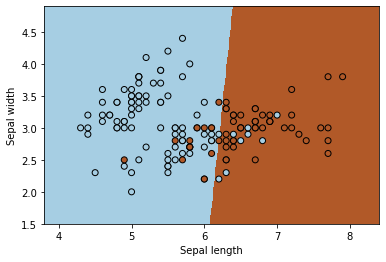

In [ ]:
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #creating x-y mesh for plot
Z = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #using the learned model to predict all points on the mesh
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired) #Complete data set with the actual labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

Though the test accuracy is coming out to be better than training accuracy, we need to be careful as essentially we are dealing with imbalanced data. The number of samples with 0 label is significantly larger than the number of samples with 1 label. A better look may be obtained by looking at the corresponding **Confusion Matrix**.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[26  6]
 [ 2 11]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

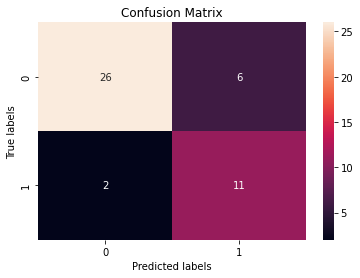

In [ ]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In order to deal with *imbalanced data*, we can look at the following:


*   True Positive  (TP)
*   True Negative  (TN)
*   False Positive (FP)
*   False Negative (FN).

Based on the above classes, the following can be defined:
$$Sensitivity = \frac{TP}{TP + FN}$$
$$Specificity = \frac{TN}{FP + TN}$$
$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F-Measure = 2\frac{Precision\times Recall}{Precision + Recall}$$

Note: All the expressions are based on the existence of a positive class and a negative class.






In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_test_predicted) #class-wise evaluation of the metrics.

(array([0.92857143, 0.64705882]),
 array([0.8125    , 0.84615385]),
 array([0.86666667, 0.73333333]),
 array([32, 13]))

$\Huge{\text{Linear Regression with Regularizers}}$

Now we shall learn about linear regression when we impose regularizers on the parameters. 

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers. Now let us consider some open source data sets available in the internet. The data set we will consider represents airline maintanence costs for different airline companies as a response variable dependent on multiple attributes.

In [ ]:
#Let us explore the data and the description 

#Get the data from the web 
const_maint_data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/const_maint.dat', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
const_maint_data.head()


,0,1,2,3,4,5
0,1,6.068,1,0,0,16.60
1,2,4.602,1,0,0,20.37
2,3,3.282,1,0,0,20.37
3,4,2.192,1,1,0,20.37
4,5,2.572,1,1,0,20.37


In [ ]:
#if you wish to print the entire data, then use the following
const_maint_data

,0,1,2,3,4,5
0,1,6.068,1,0,0,16.60
1,2,4.602,1,0,0,20.37
2,3,3.282,1,0,0,20.37
3,4,2.192,1,1,0,20.37
4,5,2.572,1,1,0,20.37
5,6,4.142,1,0,0,20.37
6,7,5.321,1,1,1,21.00
7,8,4.421,1,1,1,21.00
8,9,5.301,1,1,1,21.00
9,10,9.679,1,0,0,27.01


In [ ]:
#if you wish to print the entire data, then use the following
const_maint_data

,0,1,2,3,4,5
0,1,6.068,1,0,0,16.60
1,2,4.602,1,0,0,20.37
2,3,3.282,1,0,0,20.37
3,4,2.192,1,1,0,20.37
4,5,2.572,1,1,0,20.37
5,6,4.142,1,0,0,20.37
6,7,5.321,1,1,1,21.00
7,8,4.421,1,1,1,21.00
8,9,5.301,1,1,1,21.00
9,10,9.679,1,0,0,27.01


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [ ]:
import urllib.request  #this package is useful for accessing text files over internet 
const_maint_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/const_maint.txt')


for line in const_maint_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

Dataset:  const_maint.dat



Source: D.J. Edwards, G.D. Holt, F.C. Harris (2000). "A Comparative

Analysis Between the Multilayer Perceptron "Neural Network" and Multiple

Regression Analysis for Predicting Construction Plant Maintenance Costs,"

Journal of Quality in Maintenance Engineering, Vol. 6, #1, pp. 45-61



Description: Regression Analysis relating construction plant maintenance costs

to: machine weight, and indicators attitude to used oil analysis,

type of industry, and type of machine.



Variables/Columns

Machine ID   7-8

Cost (pounds)  10-16

Type of Industry    24    /* 1=opencast coal   0=opencast slate */

Type of machine   32     /* 1=front shovel   0=backacter  */

Company attitude to used oil analysis   40  /* 1=regular us   0=not  */

Machine weight  (tonnes)  42-48



Having known the data description, let us insert the descriptions into the data now.

In [ ]:
const_maint_data.columns = ['Machine ID', 'Cost (pounds)', 'Type of Industry','Type of machine','Company attitude to used oil analysis','Machine weight (tonnes)']


#check by printing the data again
const_maint_data.head()

,Machine ID,Cost (pounds),Type of Industry,Type of machine,Company attitude to used oil analysis,Machine weight (tonnes)
0,1,6.068,1,0,0,16.60
1,2,4.602,1,0,0,20.37
2,3,3.282,1,0,0,20.37
3,4,2.192,1,1,0,20.37
4,5,2.572,1,1,0,20.37


$\Large{\text{Let's now split the data into train and test set}}$.

In [ ]:
from sklearn.model_selection import train_test_split
const_maint_data_train,const_maint_data_test = train_test_split(const_maint_data,test_size=0.2, random_state = 1)
print ('size of train set:',len(const_maint_data_train.index))
print ('Training data:')
const_maint_data_train.head()

size of train set: 26
Training data:


,Machine ID,Cost (pounds),Type of Industry,Type of machine,Company attitude to used oil analysis,Machine weight (tonnes)
25,26,8.535,1,0,1,21.70
24,25,9.721,1,0,1,22.60
30,31,4.069,0,0,0,46.27
17,18,10.859,1,0,0,46.27
22,23,61.671,1,1,0,335.00


$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$ 

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

$\Large{\text{Solving the OLS optimization problem}}:$

Assuming the responses $y^1,y^2,\ldots,y^n$ are present in a $n \times 1$ matrix represented as:

$
\mathbf{y}=\begin{bmatrix}
y^1 \\ y^2 \\ \vdots \\ y^n
\end{bmatrix}
$

and the predictor variables $\mathbf{x}^1,\mathbf{x}^2,\ldots,\mathbf{x}^d$ are placed in a $n\times (d+1)$ matrix represented as:

$
\mathbf{X}=\begin{bmatrix}
\leftarrow & \mathbf{x}^1 & \rightarrow & 1 \\
\leftarrow & \mathbf{x}^2 & \rightarrow & 1 \\
\leftarrow & \ldots & \rightarrow & 1  \\
\leftarrow & \mathbf{x}^n & \rightarrow & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
{x}_1^1 & {x}_2^1 &\ldots & {x}_d^1 & 1 \\
{x}_1^2 & {x}_2^2 &\ldots & {x}_d^2 & 1 \\
\vdots & \vdots & \ldots & \vdots \\
{x}_1^n & {x}_2^n &\ldots & {x}_d^n & 1 
\end{bmatrix}
$
where note that the last column of matrix $\mathbf{X}$ contains a column of all ones. This column is useful to incorporate the effect of $\beta_0$ parameter in $\mathbf{X}$ matrix. 

Similarly assume that 
 we can write the coefficients $\beta_0,\beta_1,\ldots,\beta_d$ as a $(d+1)\times 1$ matrix represented as:

$
\mathbf{\beta} = \begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}.
$

Now we can write the objective function as:

$
L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2.
$

To solve 

$
\min_\beta L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is valid only when $(\mathbf{X}^\top\mathbf{X})^{-1}$ is invertible. Otherwise we need to solve the system given by:

$
\mathbf{X}^\top\mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
$
using a solver. 



$\Large{\text{Computing } \beta \text{ for the airline costs data set}}:$

In [ ]:
#Let us now compute beta 
n = len(const_maint_data_train.index) #number of data points in the data set
print('number of points in the training data set:',n)

number of points in the training data set: 26


In [ ]:
#extract the predictor variable columns 
cols = [2,3,4,5]
X_train_data = const_maint_data_train[const_maint_data_train.columns[cols]]

X_train_data

,Type of Industry,Type of machine,Company attitude to used oil analysis,Machine weight (tonnes)
25,1,0,1,21.70
24,1,0,1,22.60
30,0,0,0,46.27
17,1,0,0,46.27
22,1,1,0,335.00
4,1,1,0,20.37
2,1,0,0,20.37
21,1,1,0,218.00
23,1,0,1,228.00
10,1,0,1,31.00


In [ ]:
#convert predictor variable columns into a numpy array

X_train_array = const_maint_data_train[const_maint_data_train.columns[cols]].to_numpy()
X_train_array

array([[  1.  ,   0.  ,   1.  ,  21.7 ],
       [  1.  ,   0.  ,   1.  ,  22.6 ],
       [  0.  ,   0.  ,   0.  ,  46.27],
       [  1.  ,   0.  ,   0.  ,  46.27],
       [  1.  ,   1.  ,   0.  , 335.  ],
       [  1.  ,   1.  ,   0.  ,  20.37],
       [  1.  ,   0.  ,   0.  ,  20.37],
       [  1.  ,   1.  ,   0.  , 218.  ],
       [  1.  ,   0.  ,   1.  , 228.  ],
       [  1.  ,   0.  ,   1.  ,  31.  ],
       [  1.  ,   0.  ,   1.  ,  31.  ],
       [  1.  ,   0.  ,   1.  ,  22.6 ],
       [  0.  ,   1.  ,   0.  ,  68.42],
       [  1.  ,   1.  ,   1.  ,  21.  ],
       [  1.  ,   0.  ,   1.  ,  33.2 ],
       [  1.  ,   1.  ,   1.  ,  21.  ],
       [  1.  ,   1.  ,   1.  , 229.  ],
       [  1.  ,   0.  ,   0.  ,  20.37],
       [  1.  ,   0.  ,   0.  ,  46.27],
       [  1.  ,   0.  ,   0.  ,  16.6 ],
       [  0.  ,   0.  ,   0.  ,  46.27],
       [  1.  ,   0.  ,   0.  ,  20.37],
       [  1.  ,   0.  ,   0.  ,  31.  ],
       [  1.  ,   0.  ,   0.  ,  27.01],
       [  1.  , 

In [ ]:
import numpy as np
#add a column of ones to X_array
X_train = np.hstack((X_train_array, np.ones((X_train_array.shape[0], 1), dtype=X_train_array.dtype)))

X_train

array([[  1.  ,   0.  ,   1.  ,  21.7 ,   1.  ],
       [  1.  ,   0.  ,   1.  ,  22.6 ,   1.  ],
       [  0.  ,   0.  ,   0.  ,  46.27,   1.  ],
       [  1.  ,   0.  ,   0.  ,  46.27,   1.  ],
       [  1.  ,   1.  ,   0.  , 335.  ,   1.  ],
       [  1.  ,   1.  ,   0.  ,  20.37,   1.  ],
       [  1.  ,   0.  ,   0.  ,  20.37,   1.  ],
       [  1.  ,   1.  ,   0.  , 218.  ,   1.  ],
       [  1.  ,   0.  ,   1.  , 228.  ,   1.  ],
       [  1.  ,   0.  ,   1.  ,  31.  ,   1.  ],
       [  1.  ,   0.  ,   1.  ,  31.  ,   1.  ],
       [  1.  ,   0.  ,   1.  ,  22.6 ,   1.  ],
       [  0.  ,   1.  ,   0.  ,  68.42,   1.  ],
       [  1.  ,   1.  ,   1.  ,  21.  ,   1.  ],
       [  1.  ,   0.  ,   1.  ,  33.2 ,   1.  ],
       [  1.  ,   1.  ,   1.  ,  21.  ,   1.  ],
       [  1.  ,   1.  ,   1.  , 229.  ,   1.  ],
       [  1.  ,   0.  ,   0.  ,  20.37,   1.  ],
       [  1.  ,   0.  ,   0.  ,  46.27,   1.  ],
       [  1.  ,   0.  ,   0.  ,  16.6 ,   1.  ],
       [  0.  ,   0.

In [ ]:
#convert predictor variable columns into a numpy array

response_cols = [1]
y_train = const_maint_data_train[const_maint_data_train.columns[response_cols]].to_numpy()
y_train


array([[ 8.535],
       [ 9.721],
       [ 4.069],
       [10.859],
       [61.671],
       [ 2.572],
       [ 3.282],
       [49.847],
       [56.167],
       [11.997],
       [11.397],
       [12.511],
       [ 7.119],
       [ 5.321],
       [13.045],
       [ 4.421],
       [40.727],
       [ 4.602],
       [12.139],
       [ 6.068],
       [ 6.689],
       [ 4.142],
       [ 7.757],
       [ 9.679],
       [ 5.301],
       [12.597]])

In [ ]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X_train),X_train)
print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X_train),y_train)
#print('Xy shape:',Xy.shape)

#solving a system of linear equations Ax=b, can be done using np.linalg.solve(A,b)

beta =np.linalg.solve(XTX,Xy)
#beta = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta)



XTX shape: (5, 5)
beta [[ 5.888155  ]
 [-4.81296515]
 [ 2.89210439]
 [ 0.20253284]
 [-3.30324027]]


In [ ]:
print(np.linalg.matrix_rank(XTX))
XTX_inv = np.linalg.inv(XTX)

#print(np.matmul(XTX,XTX_inv))
print ('XTX*XTX_inv =')
print (np.matmul(XTX,XTX_inv))
is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

5
XTX*XTX_inv =
[[ 1.00000000e+00 -5.55111512e-17  4.44956572e-16  2.46655994e-18
  -3.33066907e-16]
 [ 0.00000000e+00  1.00000000e+00 -3.81639165e-17  2.60208521e-18
  -8.88178420e-16]
 [-6.66133815e-16  5.55111512e-17  1.00000000e+00  1.70761842e-18
  -7.77156117e-16]
 [ 4.48349785e-14 -8.57011096e-16 -1.19145303e-14  1.00000000e+00
  -6.86421727e-14]
 [-3.99680289e-15 -3.33066907e-16  2.96637714e-16  2.22261445e-18
   1.00000000e+00]]
False


$\textbf{Note:}$ The matrix $X^\top X$ is full-rank

Let us compute the condition number of $X^\top X$.

In [ ]:
#condition number of XTX
print(np.linalg.cond(XTX))

212939.41237197566


$\textbf{Adding $\ell_2$ regularizer to improve the conditioning of the matrix}$: 

We shall motivate the use of $\ell_2$ regularizer to improve the conditioning of the matrix. 

Instead of minimizing the original OLS objective 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

we shall now minimize the OLS objective added with a scaled $\ell_2$ regularizer. 

The $\ell_2$ regularizer in $\beta \in {\mathbb{R}}^{d+1}$ is defined as the squared $\ell_2$ norm of $\beta$: 

$
\begin{align}
\|\beta\|_2^2 = \sum_{i=1}^{d+1} \beta_i^2.  
\end{align}
$

Hence we shall now solve: 
$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

The above objective function is called $\textbf{ridge}$ regression objective. $\lambda>0$ is a regularization hyperparameter. 



Now we can write the objective function as:

$
L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2.
$

To solve 

$
\min_\beta L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L_{\text{ridge}}(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta + \lambda I\beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X}+\lambda I)^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is always valid since $(\mathbf{X}^\top\mathbf{X}+\lambda I)$ is invertible.  


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [ ]:
lambdas = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 1e-05 cond(XTX+lambda I): 212937.83725164508
lambda: 0.0001 cond(XTX+lambda I): 212923.66221737218
lambda: 0.001 cond(XTX+lambda I): 212782.01560408747
lambda: 0.01 cond(XTX+lambda I): 211375.84630231213
lambda: 0.1 cond(XTX+lambda I): 198272.98653555237
lambda: 1.0 cond(XTX+lambda I): 122399.62483265983
lambda: 10.0 cond(XTX+lambda I): 25359.49153277391
lambda: 100.0 cond(XTX+lambda I): 2841.267762821886


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ , let us now solve for $\beta$ and check the solutions.

In [ ]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

betas = [] 
for lambda_ in lambdas:
  beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
  print('lambda:',lambda_)
  print('beta:',beta)
  print('***************')
  betas.append(beta)

lambda: 1e-05
beta: [[ 5.88812298]
 [-4.81295663]
 [ 2.8921031 ]
 [ 0.20253281]
 [-3.30321107]]
***************
lambda: 0.0001
beta: [[ 5.88783488]
 [-4.8128799 ]
 [ 2.89209145]
 [ 0.20253258]
 [-3.30294832]]
***************
lambda: 0.001
beta: [[ 5.88495591]
 [-4.81211266]
 [ 2.89197478]
 [ 0.20253023]
 [-3.30032267]]
***************
lambda: 0.01
beta: [[ 5.85636863]
 [-4.80443798]
 [ 2.8907866 ]
 [ 0.2025068 ]
 [-3.27424986]]
***************
lambda: 0.1
beta: [[ 5.58935359]
 [-4.72760773]
 [ 2.87696783]
 [ 0.2022772 ]
 [-3.03064336]]
***************
lambda: 1.0
beta: [[ 4.00917372]
 [-4.01600582]
 [ 2.65702969]
 [ 0.20041244]
 [-1.58905163]]
***************
lambda: 10.0
beta: [[ 1.64475018]
 [-1.44856647]
 [ 1.39842655]
 [ 0.19638749]
 [ 0.32019518]]
***************
lambda: 100.0
beta: [[ 0.41253984]
 [-0.16163301]
 [ 0.31448326]
 [ 0.20154865]
 [ 0.26069268]]
***************


$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

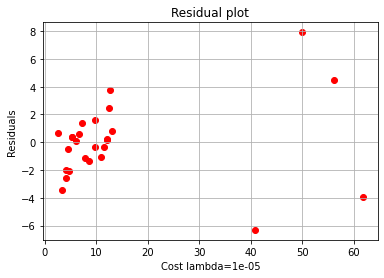

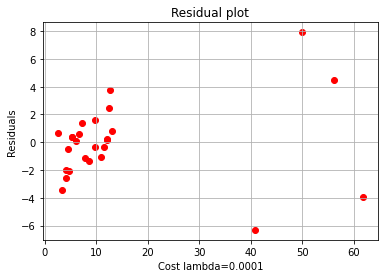

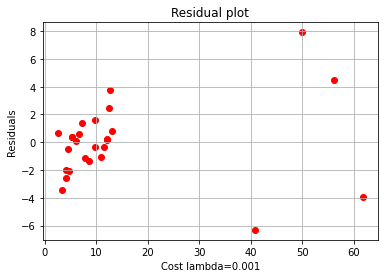

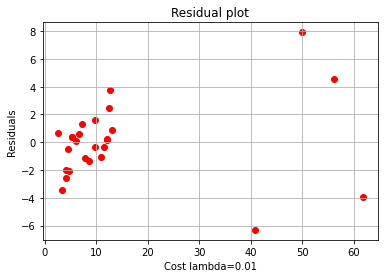

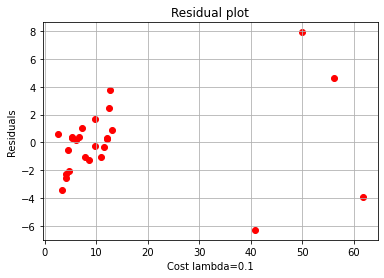

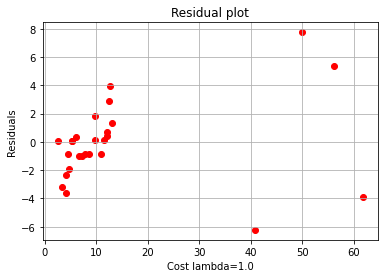

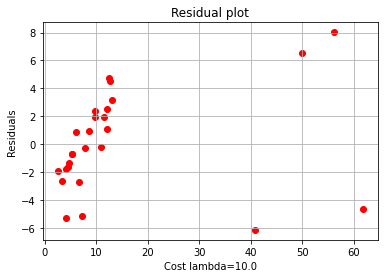

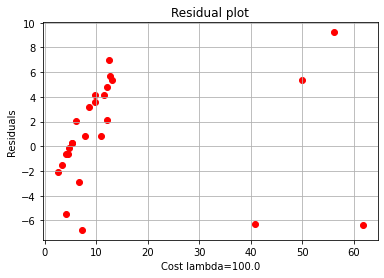

In [ ]:
beta_idx = 0
for lambda_ in lambdas: 
  beta = betas[beta_idx]
  beta_idx += 1
  xlabel = 'Cost lambda='+str(lambda_)
  e_i_residuals_list = [] 

  for i in range(n): 
    x_i = X_train[i,:] #access i-th row of X
    y_i = y_train[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    e_i_residuals_list.append(e_i) #append the value of e_i to the list 

  #plot the residuals e_i against the actual observations y_i
  plt.scatter(const_maint_data_train['Cost (pounds)'], e_i_residuals_list,color='r')
  plt.title("Residual plot")
  plt.xlabel(xlabel)
  plt.ylabel("Residuals")
  plt.grid()
  plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case. 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Let us compute $R^2$. 

In [ ]:
#We shall now compute R^2 for airline costs data

#first we shall compute y_bar 
y_bar = 0
for i in range(n): #access each row from the training data set 
  y_i = float(const_maint_data_train.iat[i,1]) #access element at TOC column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(const_maint_data_train.iat[i,1]) #access element at TOC column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals 
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx+=1
  sum_sq_residuals = 0
  for i in range(n): #access each row from the data set 
    x_i = X_train[i,:] #access i-th row of X
    y_i = y_train[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals += (e_i)**2

  print('lambda:',lambda_)
  print('sum of squared residuals:', sum_sq_residuals)

  #Then we will compute the R^2 quantity
  R_sq = 1-sum_sq_residuals/sigma_yy
  print('R^2:',R_sq)
  print('*********************')

y_bar 14.70134615384615
sigma_yy: 7108.239977884616
lambda: 1e-05
sum of squared residuals: [196.61263052]
R^2: [0.97234018]
*********************
lambda: 0.0001
sum of squared residuals: [196.61263085]
R^2: [0.97234018]
*********************
lambda: 0.001
sum of squared residuals: [196.61266345]
R^2: [0.97234018]
*********************
lambda: 0.01
sum of squared residuals: [196.61588909]
R^2: [0.97233972]
*********************
lambda: 0.1
sum of squared residuals: [196.90696914]
R^2: [0.97229877]
*********************
lambda: 1.0
sum of squared residuals: [210.69534587]
R^2: [0.970359]
*********************
lambda: 10.0
sum of squared residuals: [324.43958074]
R^2: [0.95435726]
*********************
lambda: 100.0
sum of squared residuals: [485.85703305]
R^2: [0.93164876]
*********************


Here we observe that $R^2$ value does not change at all from $\lambda = 10^{-5}$ to $\lambda = 0.001$. There is a transition (decrease) in $R^2$ value from $\lambda = 0.001$ to $\lambda = 0.01$. Therefore, we choose the $\beta$ values corresponding to $\lambda = 0.001$ for predicting test accuracy.

In [ ]:
## extracting beta value associated with lambdaa = 0.001
beta_train = betas[2] ## index 2 corresponds to lambda = 0.001
print ('best beta')
print (beta_train)

best beta
[[ 5.88495591]
 [-4.81211266]
 [ 2.89197478]
 [ 0.20253023]
 [-3.30032267]]


$\Large{\text{Checking model performance on test data}}$

Let's first prepare the test data into numpy array

In [ ]:
#extract the predictor variable columns 
cols = [2,3,4,5]
X_test_data = const_maint_data_test[const_maint_data_test.columns[cols]]

X_test_data

,Type of Industry,Type of machine,Company attitude to used oil analysis,Machine weight (tonnes)
14,0,0,0,45.00
19,0,1,0,83.70
3,1,1,0,20.37
27,1,0,1,22.60
31,1,0,0,20.37
26,1,1,1,229.00
20,1,1,0,218.00


In [ ]:
#convert predictor variable columns into a numpy array

X_test_array = const_maint_data_test[const_maint_data_test.columns[cols]].to_numpy()
X_test_array

array([[  0.  ,   0.  ,   0.  ,  45.  ],
       [  0.  ,   1.  ,   0.  ,  83.7 ],
       [  1.  ,   1.  ,   0.  ,  20.37],
       [  1.  ,   0.  ,   1.  ,  22.6 ],
       [  1.  ,   0.  ,   0.  ,  20.37],
       [  1.  ,   1.  ,   1.  , 229.  ],
       [  1.  ,   1.  ,   0.  , 218.  ]])

In [ ]:
#add a column of ones to X_train_array
X_test = np.hstack((X_test_array, np.ones((X_test_array.shape[0], 1), dtype=X_test_array.dtype)))

X_test

array([[  0.  ,   0.  ,   0.  ,  45.  ,   1.  ],
       [  0.  ,   1.  ,   0.  ,  83.7 ,   1.  ],
       [  1.  ,   1.  ,   0.  ,  20.37,   1.  ],
       [  1.  ,   0.  ,   1.  ,  22.6 ,   1.  ],
       [  1.  ,   0.  ,   0.  ,  20.37,   1.  ],
       [  1.  ,   1.  ,   1.  , 229.  ,   1.  ],
       [  1.  ,   1.  ,   0.  , 218.  ,   1.  ]])

In [ ]:
## extracting response variables
response_cols = [1]
y_test_data = const_maint_data_test[const_maint_data_test.columns[response_cols]]
y_test_data

,Cost (pounds)
14,2.471
19,3.728
3,2.192
27,11.101
31,3.622
26,66.910
20,46.057


In [ ]:
response_cols = [1]
y_test = const_maint_data_test[const_maint_data_test.columns[response_cols]].to_numpy()
y_test

array([[ 2.471],
       [ 3.728],
       [ 2.192],
       [11.101],
       [ 3.622],
       [66.91 ],
       [46.057]])

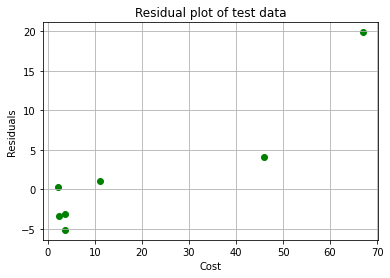

In [ ]:
## we first compute size of test data
n_test = len(const_maint_data_test.index) #number of data points in the test data
# print('number of data points in the test data:',n_test)

e_i_residuals_list_test = [] ## stores residuals on test data
for i in range(n_test): 
  x_i = X_test[i,:] #access i-th row of X_test
  y_i = y_test[i] #access i-th row of y_test

  y_pred_i = np.dot(x_i,beta_train) # compute the prediction obtained using the regression coefficients 
  e_i_test = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list_test.append(e_i_test) #append the value of e_i_test to the list 


plt.scatter(const_maint_data_test['Cost (pounds)'], e_i_residuals_list_test,color='g')
plt.title("Residual plot of test data")
plt.xlabel("Cost")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [ ]:
#We shall now compute R^2 for training airline costs data

#first we shall compute y_bar 
y_bar_test = 0
for i in range(n_test): #access each row from the test data set 
  y_test_i = float(const_maint_data_test.iat[i,1]) #access element at TOC column
  y_bar_test += y_test_i

y_bar_test /= n_test
print('y_bar_test',y_bar_test)

#Next we shall compute sigma_yy, which is the variance of y_test
sigma_yy_test = 0
for i in range(n_test): #access each row from the training data set 
  y_i = float(const_maint_data_test.iat[i,1]) #access element at TOC column
  sigma_yy_test += (y_i-y_bar_test)**2

print('sigma_yy_test:', sigma_yy_test)

#now we can compute sum of squared residuals 
sum_sq_residuals_test = 0
for i in range(n_test): #access each row from the training data set 
  x_i = X_test[i,:] #access i-th row of X_test
  y_i = y_test[i] #access i-th row of y_test

  y_pred_i = np.dot(x_i,beta_train) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals_test += (e_i)**2

print('sum of squared residuals:', sum_sq_residuals_test)
rmse = np.sqrt(sum_sq_residuals_test/n_test)
print('Root Mean Squarred Error (RMSE):', rmse)

#Then we will compute the R^2 quantity
R_sq_test = 1 - sum_sq_residuals_test/sigma_yy_test
print('R^2 score:',R_sq_test)

y_bar_test 19.440142857142856
sigma_yy_test: 4113.921042857142
sum of squared residuals: [459.76024863]
Root Mean Squarred Error (RMSE): [8.10432203]
R^2 score: [0.88824281]


$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

